### Iris Classification

Input Features:<br>
sepal_length, sepal_width, petal_length, petal_width

Target:
Iris plant Class

Objective: Predict iris plant class for a given sepal_length,sepal_width,petal_length,petal_width

Data source: https://archive.ics.uci.edu/ml/datasets/iris

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [21]:
df = pd.read_csv('iris_all.csv')

In [22]:
columns = ['encoded_class','sepal_length','sepal_width','petal_length','petal_width']

In [23]:
# Encode class labels to integers
le = preprocessing.LabelEncoder()
le.fit(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'])

LabelEncoder()

In [24]:
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='<U15')

In [25]:
df['class'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: class, dtype: int64

In [26]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [27]:
le.transform(df['class'])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
df['encoded_class']=le.transform(df['class'])

In [29]:
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,class,encoded_class
145,6.7,3.0,5.2,2.3,Iris-virginica,2
146,6.3,2.5,5.0,1.9,Iris-virginica,2
147,6.5,3.0,5.2,2.0,Iris-virginica,2
148,6.2,3.4,5.4,2.3,Iris-virginica,2
149,5.9,3.0,5.1,1.8,Iris-virginica,2


In [30]:
df['class'] =='Iris-setosa'

0       True
1       True
2       True
3       True
4       True
       ...  
145    False
146    False
147    False
148    False
149    False
Name: class, Length: 150, dtype: bool

In [31]:
# Visualize
setosa = df['class'] =='Iris-setosa'
versicolor = df['class'] == 'Iris-versicolor'
virginica = df['class'] == 'Iris-virginica'

In [32]:
setosa

0       True
1       True
2       True
3       True
4       True
       ...  
145    False
146    False
147    False
148    False
149    False
Name: class, Length: 150, dtype: bool

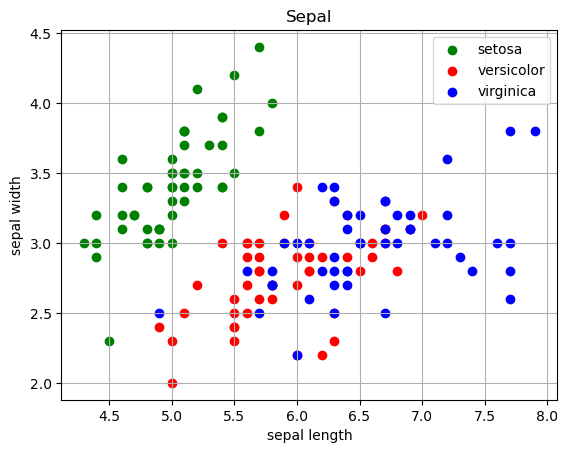

In [33]:
plt.scatter(x = df[setosa].sepal_length, y=df[setosa].sepal_width, label='setosa', color='g')
plt.scatter(x = df[versicolor].sepal_length, y=df[versicolor].sepal_width, label='versicolor', color='r')
plt.scatter(x = df[virginica].sepal_length, y=df[virginica].sepal_width, label='virginica', color='b')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.title('Sepal')
plt.grid(True)
plt.legend()
plt.show()


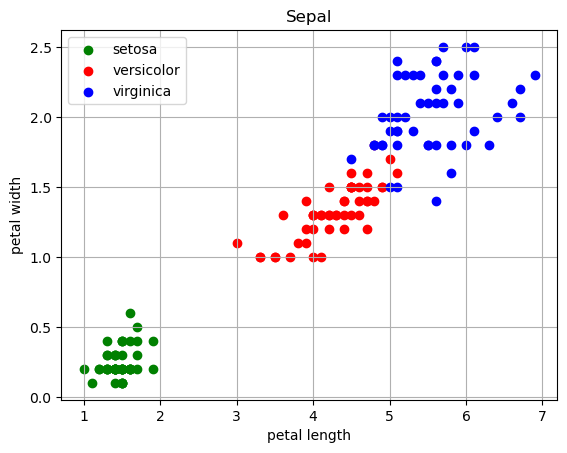

In [34]:
plt.scatter(x = df[setosa].petal_length, y=df[setosa].petal_width, label='setosa', color='g')
plt.scatter(x = df[versicolor].petal_length, y=df[versicolor].petal_width, label='versicolor', color='r')
plt.scatter(x = df[virginica].petal_length, y=df[virginica].petal_width, label='virginica', color='b')
plt.xlabel('petal length')
plt.ylabel('petal width')
plt.title('Sepal')
plt.grid(True)
plt.legend()
plt.show()

## Training and Validation dataset

Target variables as first column followed by input features:
    
class, sepal_length, sepal_width, petal_length, petal_width

In [35]:
# Training 70% of the data
# Validation = 30% of the data
# Randomize the dataset

np.random.seed(5)
l = list(df.index)
np.random.shuffle(l)
df = df.iloc[l]

In [36]:
df

,sepal_length,sepal_width,petal_length,petal_width,class,encoded_class
82,5.8,2.7,3.9,1.2,Iris-versicolor,1
134,6.1,2.6,5.6,1.4,Iris-virginica,2
114,5.8,2.8,5.1,2.4,Iris-virginica,2
42,4.4,3.2,1.3,0.2,Iris-setosa,0
109,7.2,3.6,6.1,2.5,Iris-virginica,2
...,...,...,...,...,...,...
8,4.4,2.9,1.4,0.2,Iris-setosa,0
73,6.1,2.8,4.7,1.2,Iris-versicolor,1
144,6.7,3.3,5.7,2.5,Iris-virginica,2
118,7.7,2.6,6.9,2.3,Iris-virginica,2


In [37]:
df.shape

(150, 6)

In [38]:
rows = df.shape[0]
train = int(rows*0.7)
test = rows - train

rows, train, test

(150, 105, 45)

In [41]:
df[:train].to_csv('iris_train.csv',index=False, header=False, columns=columns)

In [42]:
df[train:].to_csv('iris_validation.csv',index=False, header=False, columns=columns)

In [43]:
with open('iris_train_column_list.txt','w') as f:
    f.write(','.join(columns))